# ** _Estudo de casos do covid19 no Brasil_ **

### Equipe:
* Rosicleide Luiz de França - Matricula: 20170166830
* Sergio Ricardo Araujo do Nascimento - Matrícula 20200022201




![](covid.jpeg)

No final de 2019 na na cidade de Wuhan, no centro da China, surgiu um virus autamente transmissivel e que que se propagou no inicio do ano de 2020 para todo o globo terrestre. Esse virus foi denominado pelo nome decoronavirus que por sua vez se desenvolvia para sua forma grave que ficou conhecida por covid19. A cada dia novos casos foram identificados, desses casos era possivel acompanhar os casos de recuperados,dos que vieram a obitos e os que aindam estavam em recuperação. Diante deste cenário atual iremos trabalhar e tratar esses dataset usando o pandas no jupyter notebook como ferramenta para monitorar esses casos, verificar qual região do Brasil apresenta mais casos. 



# Daddos Utilizados
Aqui iremos usar o dataset disponiblizado no http://plataforma.saude.gov.br/coronavirus/covid-19/ 

In [67]:
#importando as bibliotecas que serão utilizadas neste trabalho
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import numpy as np

In [68]:
# Carregando o dataset

df  = pd.read_csv('summary.csv', sep=';')
df

,Abrangência,Localidade,Localidade.1,Casos Confirmados - Acumulado,Casos Confirmados - Novos,Casos Confirmados - Incremento,Casos Confirmados - Incidência*,Casos Confirmados - Em acompanhamento,Casos Confirmados - Recuperados,Óbitos Confirmados - Acumulado,Óbitos Confirmados - Novos,Óbitos Confirmados - Incremento,Óbitos Confirmados - Mortalidade*,Óbitos Confirmados - Letalidade
0,País,76,Brasil,18386894,64.134,0.35,8749.53,1.292.106,16.582.053,512.735,1.593,0.31,243.99,2.79
1,Região,1,Norte,1706208,2.774,0.16,9257.28,0,0,43.223,52.000,0.12,234.51,2.53
2,Unidade da Federação,11,RO,246612,266.000,0.11,13876.24,0,0,6.112,7.000,0.11,343.91,2.48
3,Município,110001,Alta Floresta D'Oeste,3884,5.000,0.13,16927.44,0,0,65.000,1.000,1.56,283.29,1.67
4,Município,110037,Alto Alegre dos Parecis,1444,1.000,0.07,10905.52,0,0,44.000,0.000,0.00,332.30,3.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598,Município,522205,Vicentinópolis,1242,0.000,0.00,14205.65,0,0,23.000,0.000,0.00,263.07,1.85
5599,Município,522220,Vila Boa,175,1.000,0.57,2835.85,0,0,4.000,0.000,0.00,64.82,2.29
5600,Município,522230,Vila Propício,347,0.000,0.00,5961.18,0,0,6.000,0.000,0.00,103.08,1.73
5601,Unidade da Federação,53,DF,427432,786.000,0.18,14175.59,0,0,9.184,12.000,0.13,304.58,2.15


# Tratamento dos dados
    Aqui iremos fazer o tratamento dos dados.
    

In [69]:
# verificando os tipos dos dados 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5603 entries, 0 to 5602
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Abrangência                            5603 non-null   object 
 1   Localidade                             5603 non-null   int64  
 2   Localidade.1                           5603 non-null   object 
 3   Casos Confirmados - Acumulado          5603 non-null   int64  
 4   Casos Confirmados - Novos              5603 non-null   float64
 5   Casos Confirmados - Incremento         5603 non-null   float64
 6   Casos Confirmados - Incidência*        5603 non-null   float64
 7   Casos Confirmados - Em acompanhamento  5603 non-null   object 
 8   Casos Confirmados - Recuperados        5603 non-null   object 
 9   Óbitos Confirmados - Acumulado         5603 non-null   float64
 10  Óbitos Confirmados - Novos             5603 non-null   float64
 11  Óbit

Aqui iremos excluir as colunas com dados nan, nota que a perda dos dados foram apenas cinco linhas, o que nos dá uma base confiavel, tambem iremos limitar o numero de linhas do dataset para podermos trabalhar com graficos e converter colunas em numeros.

In [15]:
df_novo = df.dropna()
df_novo

,Abrangência,Localidade,Localidade.1,Casos Confirmados - Acumulado,Casos Confirmados - Novos,Casos Confirmados - Incremento,Casos Confirmados - Incidência*,Casos Confirmados - Em acompanhamento,Casos Confirmados - Recuperados,Óbitos Confirmados - Acumulado,Óbitos Confirmados - Novos,Óbitos Confirmados - Incremento,Óbitos Confirmados - Mortalidade*,Óbitos Confirmados - Letalidade
0,País,76,Brasil,18386894,64.134,0.35,8749.53,1.292.106,16.582.053,512.735,1.593,0.31,243.99,2.79
1,Região,1,Norte,1706208,2.774,0.16,9257.28,0,0,43.223,52.000,0.12,234.51,2.53
2,Unidade da Federação,11,RO,246612,266.000,0.11,13876.24,0,0,6.112,7.000,0.11,343.91,2.48
3,Município,110001,Alta Floresta D'Oeste,3884,5.000,0.13,16927.44,0,0,65.000,1.000,1.56,283.29,1.67
4,Município,110037,Alto Alegre dos Parecis,1444,1.000,0.07,10905.52,0,0,44.000,0.000,0.00,332.30,3.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598,Município,522205,Vicentinópolis,1242,0.000,0.00,14205.65,0,0,23.000,0.000,0.00,263.07,1.85
5599,Município,522220,Vila Boa,175,1.000,0.57,2835.85,0,0,4.000,0.000,0.00,64.82,2.29
5600,Município,522230,Vila Propício,347,0.000,0.00,5961.18,0,0,6.000,0.000,0.00,103.08,1.73
5601,Unidade da Federação,53,DF,427432,786.000,0.18,14175.59,0,0,9.184,12.000,0.13,304.58,2.15


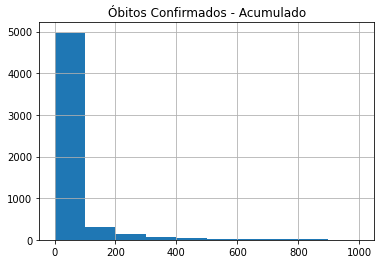

In [18]:
df.hist(column='Óbitos Confirmados - Acumulado', bins=10)
plt.show()

In [19]:
df_selecao = df['Abrangência']
df_selecao.values

array(['País', 'Região', 'Unidade da Federação', ..., 'Município',
       'Unidade da Federação', 'Município'], dtype=object)

In [20]:
df["Localidade.1"][1256]

'PB'

In [21]:
df_novo = df.loc[2:5602].copy()

In [22]:
df_novo.head()

,Abrangência,Localidade,Localidade.1,Casos Confirmados - Acumulado,Casos Confirmados - Novos,Casos Confirmados - Incremento,Casos Confirmados - Incidência*,Casos Confirmados - Em acompanhamento,Casos Confirmados - Recuperados,Óbitos Confirmados - Acumulado,Óbitos Confirmados - Novos,Óbitos Confirmados - Incremento,Óbitos Confirmados - Mortalidade*,Óbitos Confirmados - Letalidade
2,Unidade da Federação,11,RO,246612,266.0,0.11,13876.24,0,0,6.112,7.0,0.11,343.91,2.48
3,Município,110001,Alta Floresta D'Oeste,3884,5.0,0.13,16927.44,0,0,65.000,1.0,1.56,283.29,1.67
4,Município,110037,Alto Alegre dos Parecis,1444,1.0,0.07,10905.52,0,0,44.000,0.0,0.00,332.30,3.05
5,Município,110040,Alto Paraíso,1803,3.0,0.17,8414.22,0,0,48.000,0.0,0.00,224.01,2.66
6,Município,110034,Alvorada D'Oeste,1093,0.0,0.00,7584.48,0,0,29.000,0.0,0.00,201.24,2.65


In [23]:
df_novo.loc[2:10,"Abrangência":"Localidade.1"]

,Abrangência,Localidade,Localidade.1
2,Unidade da Federação,11,RO
3,Município,110001,Alta Floresta D'Oeste
4,Município,110037,Alto Alegre dos Parecis
5,Município,110040,Alto Paraíso
6,Município,110034,Alvorada D'Oeste
7,Município,110002,Ariquemes
8,Município,110045,Buritis
9,Município,110003,Cabixi
10,Município,110060,Cacaulândia


In [24]:
d = df_novo[df_novo["Casos Confirmados - Novos"] > 0].copy()
np.log10(d["Casos Confirmados - Novos"])
df_novo["log_nova_casos_confirmado"]= np.log10(d["Casos Confirmados - Novos"])
df_novo

,Abrangência,Localidade,Localidade.1,Casos Confirmados - Acumulado,Casos Confirmados - Novos,Casos Confirmados - Incremento,Casos Confirmados - Incidência*,Casos Confirmados - Em acompanhamento,Casos Confirmados - Recuperados,Óbitos Confirmados - Acumulado,Óbitos Confirmados - Novos,Óbitos Confirmados - Incremento,Óbitos Confirmados - Mortalidade*,Óbitos Confirmados - Letalidade,log_nova_casos_confirmado
2,Unidade da Federação,11,RO,246612,266.0,0.11,13876.24,0,0,6.112,7.0,0.11,343.91,2.48,2.424882
3,Município,110001,Alta Floresta D'Oeste,3884,5.0,0.13,16927.44,0,0,65.000,1.0,1.56,283.29,1.67,0.698970
4,Município,110037,Alto Alegre dos Parecis,1444,1.0,0.07,10905.52,0,0,44.000,0.0,0.00,332.30,3.05,0.000000
5,Município,110040,Alto Paraíso,1803,3.0,0.17,8414.22,0,0,48.000,0.0,0.00,224.01,2.66,0.477121
6,Município,110034,Alvorada D'Oeste,1093,0.0,0.00,7584.48,0,0,29.000,0.0,0.00,201.24,2.65,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598,Município,522205,Vicentinópolis,1242,0.0,0.00,14205.65,0,0,23.000,0.0,0.00,263.07,1.85,NaN
5599,Município,522220,Vila Boa,175,1.0,0.57,2835.85,0,0,4.000,0.0,0.00,64.82,2.29,0.000000
5600,Município,522230,Vila Propício,347,0.0,0.00,5961.18,0,0,6.000,0.0,0.00,103.08,1.73,NaN
5601,Unidade da Federação,53,DF,427432,786.0,0.18,14175.59,0,0,9.184,12.0,0.13,304.58,2.15,2.895423


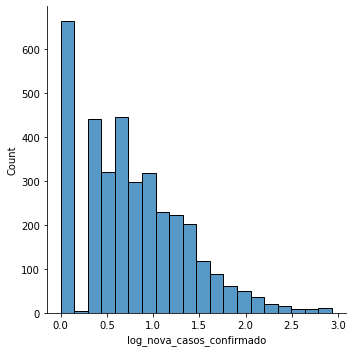

In [25]:
sns.displot(df, x = df_novo["log_nova_casos_confirmado"], bins=20)

In [26]:
#criando um novo dataframe com os dados da paraiba
b = df_novo.loc[df_novo['Localidade.1'] == "PB"]
b.value_counts()

Abrangência           Localidade  Localidade.1  Casos Confirmados - Acumulado  Casos Confirmados - Novos  Casos Confirmados - Incremento  Casos Confirmados - Incidência*  Casos Confirmados - Em acompanhamento  Casos Confirmados - Recuperados  Óbitos Confirmados - Acumulado  Óbitos Confirmados - Novos  Óbitos Confirmados - Incremento  Óbitos Confirmados - Mortalidade*  Óbitos Confirmados - Letalidade  log_nova_casos_confirmado
Unidade da Federação  25          PB            389713                         2.002                      0.52                            9698.87                          0                                      0                                8.522                           23.0                        0.27                             212.09                             2.19                             0.301464                     1
dtype: int64

In [27]:
b

,Abrangência,Localidade,Localidade.1,Casos Confirmados - Acumulado,Casos Confirmados - Novos,Casos Confirmados - Incremento,Casos Confirmados - Incidência*,Casos Confirmados - Em acompanhamento,Casos Confirmados - Recuperados,Óbitos Confirmados - Acumulado,Óbitos Confirmados - Novos,Óbitos Confirmados - Incremento,Óbitos Confirmados - Mortalidade*,Óbitos Confirmados - Letalidade,log_nova_casos_confirmado
1256,Unidade da Federação,25,PB,389713,2.002,0.52,9698.87,0,0,8.522,23.0,0.27,212.09,2.19,0.301464


In [28]:
# Criado dataframe sem 3 colunas - Limpeza da base

df_novo1 = df.dropna()
df_novo1.drop('Localidade', axis = 1, inplace = True)
df_novo1.drop('Casos Confirmados - Em acompanhamento', axis = 1, inplace = True)
df_novo1.drop('Casos Confirmados - Recuperados', axis = 1, inplace = True)
df_novo1

,Abrangência,Localidade.1,Casos Confirmados - Acumulado,Casos Confirmados - Novos,Casos Confirmados - Incremento,Casos Confirmados - Incidência*,Óbitos Confirmados - Acumulado,Óbitos Confirmados - Novos,Óbitos Confirmados - Incremento,Óbitos Confirmados - Mortalidade*,Óbitos Confirmados - Letalidade
0,País,Brasil,18386894,64.134,0.35,8749.53,512.735,1.593,0.31,243.99,2.79
1,Região,Norte,1706208,2.774,0.16,9257.28,43.223,52.000,0.12,234.51,2.53
2,Unidade da Federação,RO,246612,266.000,0.11,13876.24,6.112,7.000,0.11,343.91,2.48
3,Município,Alta Floresta D'Oeste,3884,5.000,0.13,16927.44,65.000,1.000,1.56,283.29,1.67
4,Município,Alto Alegre dos Parecis,1444,1.000,0.07,10905.52,44.000,0.000,0.00,332.30,3.05
...,...,...,...,...,...,...,...,...,...,...,...
5598,Município,Vicentinópolis,1242,0.000,0.00,14205.65,23.000,0.000,0.00,263.07,1.85
5599,Município,Vila Boa,175,1.000,0.57,2835.85,4.000,0.000,0.00,64.82,2.29
5600,Município,Vila Propício,347,0.000,0.00,5961.18,6.000,0.000,0.00,103.08,1.73
5601,Unidade da Federação,DF,427432,786.000,0.18,14175.59,9.184,12.000,0.13,304.58,2.15


In [29]:
# Renomear as colunas para facilitar leitura nos gráficos

#Abrangência                       -> Abrangência
#Localidade.1                      -> UF
#Casos Confirmados - Acumulado     -> CCA
#Casos Confirmados - Novos         -> CCN
#Casos Confirmados - Incremento    -> CCI
#Casos Confirmados - Incidência*   -> CCI*
#Óbitos Confirmados - Acumulado    -> OCA
#Óbitos Confirmados - Novos        -> OCN
#Óbitos Confirmados - Incremento   -> OCI
#Óbitos Confirmados - Mortalidade* -> OCM*
#Óbitos Confirmados - Letalidade   -> OCL


df_novo1.columns = ['Abrangência', 'Região/UF', 'CCA', 'CCN', 'CCI', 'CCI*', 'OCA', 'OCN', 'OCI', 'OCM*', 'OCL']

In [30]:
# Aqui criamos um dataset por Região do Brasil

regiao = df_novo1.loc[df_novo1['Abrangência'] == "Região"]
regiao

,Abrangência,Região/UF,CCA,CCN,CCI,CCI*,OCA,OCN,OCI,OCM*,OCL
1,Região,Norte,1706208,2.774,0.16,9257.28,43.223,52.0,0.12,234.51,2.53
459,Região,Nordeste,4351261,13.093,0.30,7624.21,105.257,271.0,0.26,184.43,2.42
2263,Região,Sudeste,6936003,29.986,0.43,7848.69,238.193,924.0,0.39,269.54,3.43
3936,Região,Sul,3517927,12.930,0.37,11735.82,78.188,179.0,0.23,260.84,2.22
5131,Região,Centro-Oeste,1875495,5.351,0.29,11508.17,47.874,167.0,0.35,293.76,2.55


In [31]:
regiao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1 to 5131
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Abrangência  5 non-null      object 
 1   Região/UF    5 non-null      object 
 2   CCA          5 non-null      int64  
 3   CCN          5 non-null      float64
 4   CCI          5 non-null      float64
 5   CCI*         5 non-null      float64
 6   OCA          5 non-null      float64
 7   OCN          5 non-null      float64
 8   OCI          5 non-null      float64
 9   OCM*         5 non-null      float64
 10  OCL          5 non-null      float64
dtypes: float64(8), int64(1), object(2)
memory usage: 480.0+ bytes


In [32]:
# Aqui criamos um dataset por UF do Brasil

uf = df_novo1.loc[df_novo1['Abrangência'] == "Unidade da Federação"]
uf

,Abrangência,Região/UF,CCA,CCN,CCI,CCI*,OCA,OCN,OCI,OCM*,OCL
2,Unidade da Federação,RO,246612,266.000,0.11,13876.24,6.112,7.0,0.11,343.91,2.48
55,Unidade da Federação,AC,85383,110.000,0.13,9681.33,1.736,0.0,0.00,196.84,2.03
78,Unidade da Federação,AM,400533,471.000,0.12,9663.98,13.267,3.0,0.02,320.10,3.31
141,Unidade da Federação,RR,111436,328.000,0.30,18396.03,1.731,4.0,0.23,285.76,1.55
157,Unidade da Federação,PR,549351,861.000,0.16,6385.68,15.389,29.0,0.19,178.88,2.80
302,Unidade da Federação,AP,116619,143.000,0.12,13789.14,1.822,2.0,0.11,215.43,1.56
319,Unidade da Federação,TO,196274,595.000,0.30,12478.75,3.166,7.0,0.22,201.29,1.61
460,Unidade da Federação,MA,314866,1.064,0.34,4450.29,8.946,27.0,0.30,126.44,2.84
678,Unidade da Federação,PI,294288,672.000,0.23,8990.76,6.511,21.0,0.32,198.92,2.21
903,Unidade da Federação,CE,878665,2.610,0.30,9621.74,22.420,68.0,0.30,245.51,2.55


In [33]:
uf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 2 to 5601
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Abrangência  27 non-null     object 
 1   Região/UF    27 non-null     object 
 2   CCA          27 non-null     int64  
 3   CCN          27 non-null     float64
 4   CCI          27 non-null     float64
 5   CCI*         27 non-null     float64
 6   OCA          27 non-null     float64
 7   OCN          27 non-null     float64
 8   OCI          27 non-null     float64
 9   OCM*         27 non-null     float64
 10  OCL          27 non-null     float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.5+ KB


<AxesSubplot:>

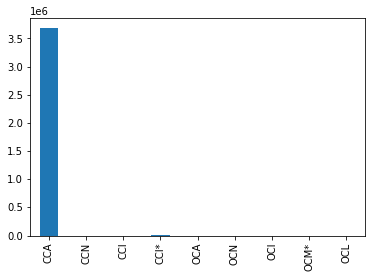

In [34]:
regiao.mean().plot.bar()

<AxesSubplot:>

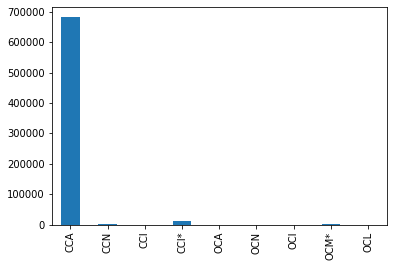

In [35]:
uf.mean().plot.bar()

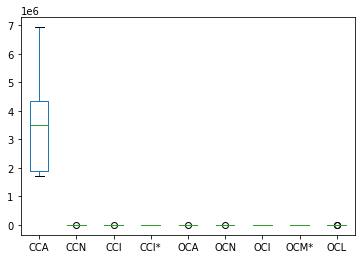

In [36]:
figr, axr = plt.subplots()
axr = regiao.plot.box(ax = axr)
plt.show()

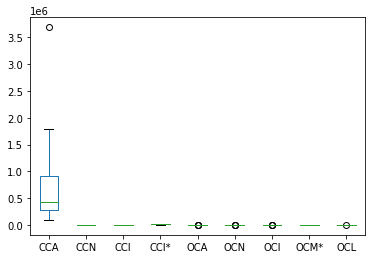

In [37]:
figr, axu = plt.subplots()
axu = uf.plot.box(ax = axu)
plt.show()

In [38]:
a = b["Casos Confirmados - Acumulado"]
c = b["Casos Confirmados - Novos"]
d = b["Casos Confirmados - Incremento"]
e = b["Casos Confirmados - Incidência*"]
#f = b["Casos Confirmados - Em acompanhamento"]
#g = b["Casos Confirmados - Recuperados"]
h = b["Óbitos Confirmados - Acumulado"]
i = b["Óbitos Confirmados - Novos"]
j = b["Óbitos Confirmados - Incremento"]
l = b["Óbitos Confirmados - Mortalidade*"]
m = b["Óbitos Confirmados - Letalidade"]

type(m)

pandas.core.series.Series

<AxesSubplot:>

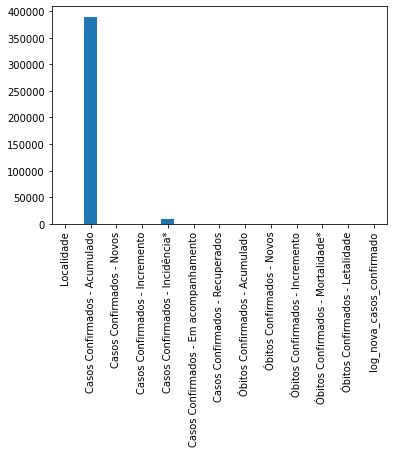

In [40]:
b.mean().plot.bar()

<AxesSubplot:xlabel='Óbitos Confirmados - Acumulado'>

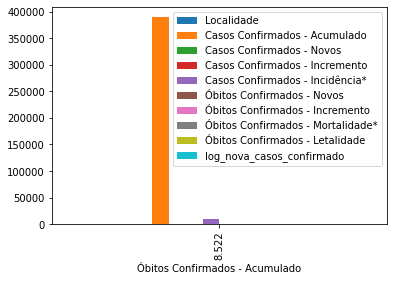

In [41]:
b.groupby("Óbitos Confirmados - Acumulado").mean().plot.bar()

In [42]:
b.sort_values(by="Óbitos Confirmados - Acumulado", ascending=False)[["Óbitos Confirmados - Acumulado", "Óbitos Confirmados - Acumulado"]]

,Óbitos Confirmados - Acumulado,Óbitos Confirmados - Acumulado
1256,8.522,8.522


In [43]:
b.sort_values(by="Casos Confirmados - Acumulado", ascending=False)[["Casos Confirmados - Acumulado", "Casos Confirmados - Acumulado"]]

,Casos Confirmados - Acumulado,Casos Confirmados - Acumulado
1256,389713,389713


In [44]:
b.sort_values(by="Casos Confirmados - Recuperados", ascending=False)[["Casos Confirmados - Recuperados", "Casos Confirmados - Recuperados"]]

,Casos Confirmados - Recuperados,Casos Confirmados - Recuperados
1256,0,0


In [45]:
b[["Casos Confirmados - Acumulado","Óbitos Confirmados - Acumulado"]].corr()

,Casos Confirmados - Acumulado,Óbitos Confirmados - Acumulado
Casos Confirmados - Acumulado,NaN,NaN
Óbitos Confirmados - Acumulado,NaN,NaN


In [46]:
b.describe()

,Localidade,Casos Confirmados - Acumulado,Casos Confirmados - Novos,Casos Confirmados - Incremento,Casos Confirmados - Incidência*,Óbitos Confirmados - Acumulado,Óbitos Confirmados - Novos,Óbitos Confirmados - Incremento,Óbitos Confirmados - Mortalidade*,Óbitos Confirmados - Letalidade,log_nova_casos_confirmado
count,1.0,1.0,1.000,1.00,1.00,1.000,1.0,1.00,1.00,1.00,1.000000
mean,25.0,389713.0,2.002,0.52,9698.87,8.522,23.0,0.27,212.09,2.19,0.301464
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,25.0,389713.0,2.002,0.52,9698.87,8.522,23.0,0.27,212.09,2.19,0.301464
25%,25.0,389713.0,2.002,0.52,9698.87,8.522,23.0,0.27,212.09,2.19,0.301464
50%,25.0,389713.0,2.002,0.52,9698.87,8.522,23.0,0.27,212.09,2.19,0.301464
75%,25.0,389713.0,2.002,0.52,9698.87,8.522,23.0,0.27,212.09,2.19,0.301464
max,25.0,389713.0,2.002,0.52,9698.87,8.522,23.0,0.27,212.09,2.19,0.301464


In [47]:
sns.set_palette("Set2")

In [49]:
regiao.corr()

,CCA,CCN,CCI,CCI*,OCA,OCN,OCI,OCM*,OCL
CCA,1.000000,0.985041,0.817120,-0.607421,0.972494,0.931320,0.598623,-0.085887,0.721738
CCN,0.985041,1.000000,0.864663,-0.495585,0.981521,0.960566,0.657190,0.083323,0.769216
CCI,0.817120,0.864663,1.000000,-0.061892,0.766265,0.766369,0.768273,0.302207,0.477445
CCI*,-0.607421,-0.495585,-0.061892,1.000000,-0.606733,-0.538443,-0.086521,0.636046,-0.543352
OCA,0.972494,0.981521,0.766265,-0.606733,1.000000,0.987148,0.641944,0.055241,0.861530
OCN,0.931320,0.960566,0.766369,-0.538443,0.987148,1.000000,0.723370,0.188914,0.912061
OCI,0.598623,0.657190,0.768273,-0.086521,0.641944,0.723370,1.000000,0.474692,0.622647
OCM*,-0.085887,0.083323,0.302207,0.636046,0.055241,0.188914,0.474692,1.000000,0.296221
OCL,0.721738,0.769216,0.477445,-0.543352,0.861530,0.912061,0.622647,0.296221,1.000000


<AxesSubplot:>

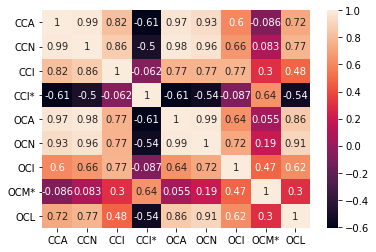

In [50]:
# Matriz Confusão por Região

sns.heatmap(regiao.corr(), annot = True)

In [51]:
uf.corr()

,CCA,CCN,CCI,CCI*,OCA,OCN,OCI,OCM*,OCL
CCA,1.000000,-0.393953,0.512206,-0.241359,0.958059,0.945135,0.375382,0.115169,0.327669
CCN,-0.393953,1.000000,-0.428991,0.153678,-0.370121,-0.343672,-0.257316,-0.003105,-0.228407
CCI,0.512206,-0.428991,1.000000,-0.199406,0.430571,0.502407,0.730046,-0.206729,-0.018138
CCI*,-0.241359,0.153678,-0.199406,1.000000,-0.324256,-0.273072,-0.197768,0.525509,-0.599623
OCA,0.958059,-0.370121,0.430571,-0.324256,1.000000,0.971274,0.353079,0.186338,0.532906
OCN,0.945135,-0.343672,0.502407,-0.273072,0.971274,1.000000,0.460387,0.132949,0.411026
OCI,0.375382,-0.257316,0.730046,-0.197768,0.353079,0.460387,1.000000,-0.046438,0.150179
OCM*,0.115169,-0.003105,-0.206729,0.525509,0.186338,0.132949,-0.046438,1.000000,0.284117
OCL,0.327669,-0.228407,-0.018138,-0.599623,0.532906,0.411026,0.150179,0.284117,1.000000


<AxesSubplot:>

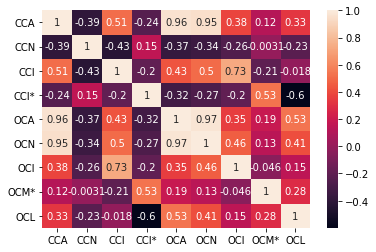

In [52]:
# Matriz Confusão por UF

sns.heatmap(uf.corr(), annot = True)

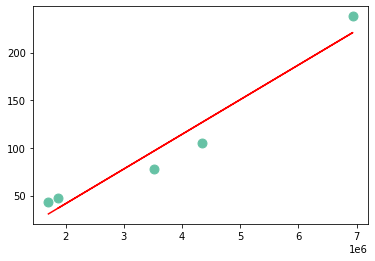

In [53]:
# Gráfico da regressão linear entre as colunas Casos Confirmados - Acumulado x Óbitos Confirmados - Acumulado 
# por região

resultado = linregress(regiao['CCA'], regiao['OCA'])
plt.scatter(regiao['CCA'], regiao['OCA'], s = 80)
plt.plot(regiao['CCA'], ((regiao['CCA'] * resultado.slope) + resultado.intercept), color = 'r')
plt.show()

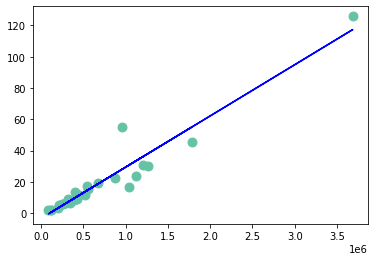

In [54]:
# Gráfico da regressão linear entre as colunas Casos Confirmados - Acumulado x Óbitos Confirmados - Acumulado 
# por UF

resultado = linregress(uf['CCA'], uf['OCA'])
plt.scatter(uf['CCA'], uf['OCA'], s = 80)
plt.plot(uf['CCA'], ((uf['CCA'] * resultado.slope) + resultado.intercept), color = 'b')
plt.show()

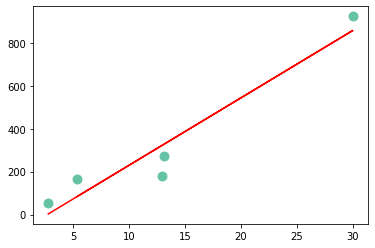

In [55]:
# Gráfico da regressão linear entre as colunas Casos Confirmados - Novos x Óbitos Confirmados - Novos 
# por região

resultado = linregress(regiao['CCN'], regiao['OCN'])
plt.scatter(regiao['CCN'], regiao['OCN'], s = 80)
plt.plot(regiao['CCN'], ((regiao['CCN'] * resultado.slope) + resultado.intercept), color = 'r')
plt.show()

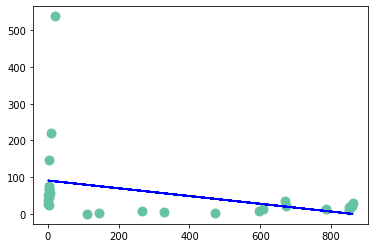

In [56]:
# Gráfico da regressão linear entre as colunas Casos Confirmados - Novos x Óbitos Confirmados - Novos 
# por UF

resultado = linregress(uf['CCN'], uf['OCN'])
plt.scatter(uf['CCN'], uf['OCN'], s = 80)
plt.plot(uf['CCN'], ((uf['CCN'] * resultado.slope) + resultado.intercept), color = 'b')
plt.show()

<AxesSubplot:xlabel='Região/UF', ylabel='OCA'>

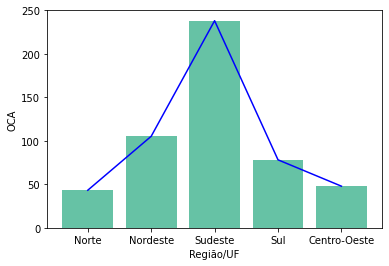

In [57]:
# Gráfico de Barras de Óbitos Confirmados - Acumulado por Região (em milhares)

plt.bar(regiao["Região/UF"], regiao["OCA"], width = 0.8, bottom = None, align = 'center')
sns.lineplot(data = regiao, x = "Região/UF", y = "OCA", color = "b")

<AxesSubplot:xlabel='Região/UF', ylabel='OCN'>

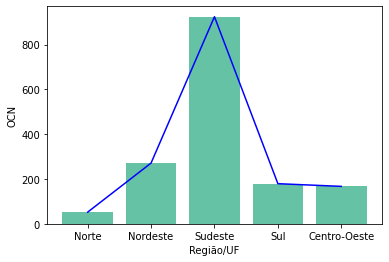

In [58]:
# Gráfico de Barras de Óbitos Confirmados - Novos por Região

plt.bar(regiao["Região/UF"], regiao["OCN"], width = 0.8, bottom = None, align = 'center')
sns.lineplot(data = regiao, x = "Região/UF", y = "OCN", color = "b")

<AxesSubplot:xlabel='Região/UF', ylabel='OCL'>

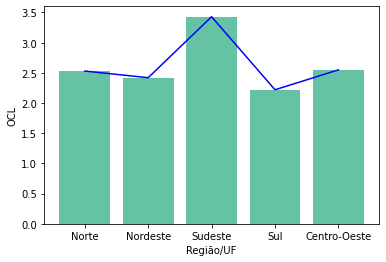

In [59]:
# Gráfico de Barras de Óbitos Confirmados - Letalidade por Região

plt.bar(regiao["Região/UF"], regiao["OCL"], width = 0.8, bottom = None, align = 'center')
sns.lineplot(data = regiao, x = "Região/UF", y = "OCL", color = "b")

<AxesSubplot:xlabel='Região/UF', ylabel='OCM*'>

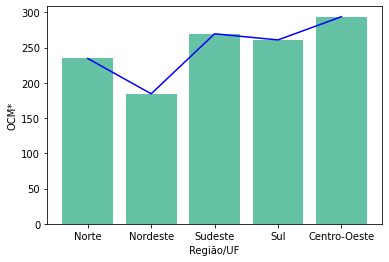

In [60]:
# Gráfico de Barras de Óbitos Confirmados - Mortalidade* por Região

plt.bar(regiao["Região/UF"], regiao["OCM*"], width = 0.8, bottom = None, align = 'center')
sns.lineplot(data = regiao, x = "Região/UF", y = "OCM*", color = "b")

<BarContainer object of 27 artists>

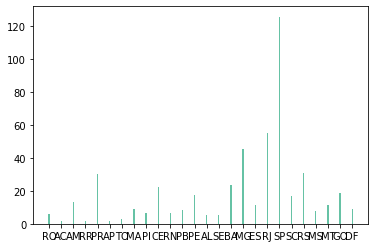

In [61]:
# Gráfico de Barras de Óbitos Confirmados - Acumulado por UF

plt.bar(uf["Região/UF"], uf["OCA"], width = 0.1)

<AxesSubplot:>

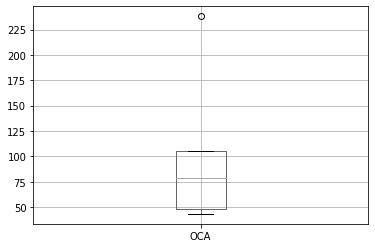

In [62]:
# Boxplot de Óbitos Confirmados - Acumulado por Região

regiao.boxplot(column = ["OCA"])

<AxesSubplot:>

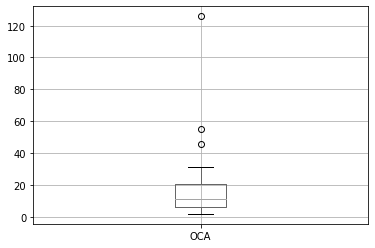

In [63]:
# Boxplot de Óbitos Confirmados - Acumulado por UF

uf.boxplot(column = ["OCA"])

<AxesSubplot:ylabel='OCA'>

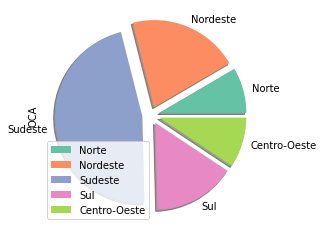

In [64]:
# Gráfico de Setores de Óbitos Confirmados - Acumulado por Região

regiao.plot.pie(y = "OCA", labels = regiao["Região/UF"], shadow = True, explode = (.1, .1, .1, .1, .1))

<AxesSubplot:ylabel='OCL'>

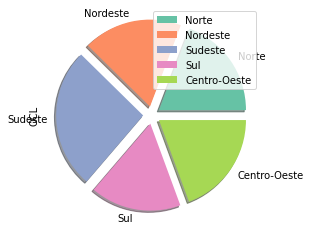

In [65]:
# Gráfico de Setores de Óbitos Confirmados - Letalidade por Região

regiao.plot.pie(y = "OCL", labels = regiao["Região/UF"], shadow = True, explode = (.1, .1, .1, .1, .1))

<AxesSubplot:ylabel='OCA'>

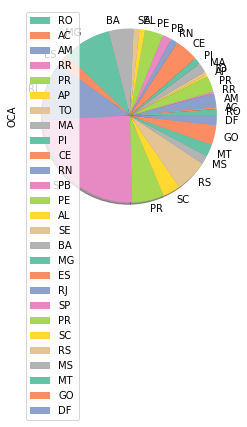

In [66]:
# Gráfico de Setores de Óbitos Confirmados - Acumulado por UF

uf.plot.pie(y = "OCA", labels = uf["Região/UF"], shadow = True)

# Conclusões:

Como era de se esperar as região onde mais acontecem casos de COVID-19 é a região Sudeste, por ser a mais populosa, assim como também mais mortes.

Dentro da região sudeste, o Estado de São Paulo, por ser o mais populoso, segue a tenência de maios número de casos e de mortes.

Interessante notar que a região Nordeste é a que menos apresenta mortalidade por 100.000 habitantes.

Já as regiões Sul e Nordeste apresentam as menores letalidades, enquanto a região Sudeste apresenta a maior letalidade entre as cinco regiões. 

# Limitações e Melhorias

A base de dados não tem nenhuma informação a respeito da vacinação, de quantas pessoas por UF/Região não tomou nenhuma dose de vacina, das que tomaram apenas uma dose e que tomaram as duas doses da vacina.

Com a disponibilidade destas informações, no futoro poderá ser realizado um trabalho utilizando estes dados para verificar até que ponto a vacinação interfere em novos casos e no número de mortes.
